# 랜덤포레스트 다중 분류
- [다중 분류 code](https://moondol-ai.tistory.com/59)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('/content/drive/MyDrive/슬기로운 건강생활/data/health_data(BMI)_02.csv', encoding='cp949')
df

,성별,나이,신장,체중,bmi,BMI.1
0,0,40,165,60,22.0,0
1,1,60,150,65,28.9,3
2,1,50,155,55,22.9,0
3,0,60,160,70,27.3,2
4,1,50,155,50,20.8,0
...,...,...,...,...,...,...
987327,1,60,145,55,26.2,1
987328,1,50,160,55,21.5,0
987329,0,40,175,70,22.9,0
987330,1,40,160,70,27.3,2


In [5]:
train = df

In [8]:
# feature와 target 분리
yt=np.array(train['BMI.1'])
xt=train.drop(['BMI.1'], axis=1)
xt=np.array(xt)

# 데이터 정규화
scaler=MinMaxScaler()
xt=scaler.fit_transform(xt)

# train test 데이터 split
xtrain,xtest,ytrain,ytest=train_test_split(xt, yt, test_size=0.2, random_state=42)

In [11]:
# 랜덤포레스트 without tuning
rf = RandomForestClassifier(random_state=17)
rf.fit(xtrain, ytrain)
forest_predictions = rf.predict(xtest)

accuracy_score(ytest, forest_predictions)
forest_predictions = rf.predict(xtest)

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [13]:
print(confusion_matrix(ytest, forest_predictions))

[[117438      0      0      0      0]
 [     0  33291      0      0      0]
 [     0      0  23148      0      0]
 [     0      0      0  13123      0]
 [     0      0      0      0  10467]]


In [14]:
print(classification_report(ytest, forest_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117438
           1       1.00      1.00      1.00     33291
           2       1.00      1.00      1.00     23148
           3       1.00      1.00      1.00     13123
           4       1.00      1.00      1.00     10467

    accuracy                           1.00    197467
   macro avg       1.00      1.00      1.00    197467
weighted avg       1.00      1.00      1.00    197467



In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0, flags=flags)


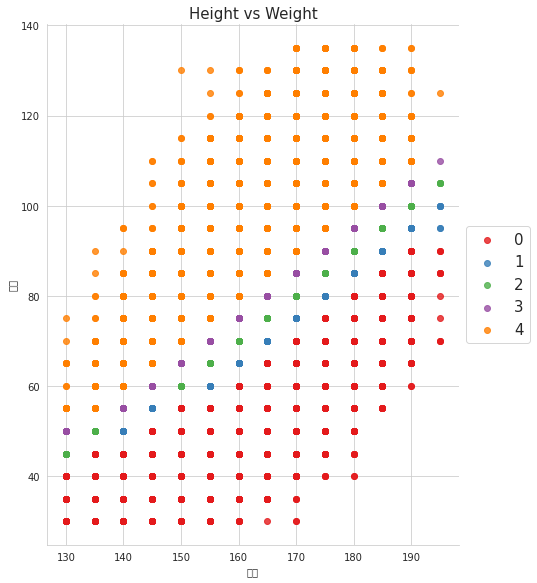

In [18]:
sns.set_style('whitegrid')

# colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
## http://colorbrewer2.org/#type=qualitative&scheme=Set2&n=6

# plt.scatter(x='Height',y='Weight',data=data_visual,c=data_visual['Index'],
#             cmap=matplotlib.colors.ListedColormap(colors))
# plt.colorbar()

## https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

sns.lmplot( x='신장', y='체중', data=train, 
           fit_reg=False, 
           hue='BMI.1', 
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

## https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})